# Hotel_reservation 

Key Features:

1-Booking_ID: Unique identifier for each reservation.

2-no_of_adults: Number of adults in the booking.

3-no_of_children: Number of children included in the booking.

4-no_of_weekend_nights: Number of weekend nights booked (Friday, Saturday).

5-no_of_week_nights: Number of weekdays booked.

6-type_of_meal_plan: Meal plan selected by the guest (e.g., Meal Plan 1, Not Selected).

7-required_car_parking_space: Indicates if a car parking space was requested (1 = Yes, 0 = No).

8-room_type_reserved: Type of room reserved (e.g., Room_Type 1, Room_Type 2).

9-lead_time: Days between booking date and arrival date.

10-arrival_year, arrival_month, arrival_date: The year, month, and date of arrival.

11-market_segment_type: How the booking was made (e.g., Online, Offline).

12-repeated_guest: Indicates if the guest has booked before (1 = Yes, 0 = No).

13-no_of_previous_cancellations: Count of previous bookings canceled by the guest.

14-no_of_previous_bookings_not_canceled: Count of previous bookings that were not canceled.

15-avg_price_per_room: Average price per room for the booking.

16-no_of_special_requests: Number of special requests made by the guest (e.g., extra pillows, late check-in).

17-booking_status: Target variable indicating whether the booking was "Canceled" or "Not_Canceled".

In [1995]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,classification_report,precision_score
from imblearn.over_sampling import SMOTE
import math
import warnings
warnings.filterwarnings('ignore')

# Load The data

In [1996]:
df=pd.read_csv("Hotel Reservations.csv")

# Describe some Fields in the Data

In [1997]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [1998]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Booking_ID,object,"[INN00001, INN24187, INN24181, INN24182, INN24...",36275,0,0.0,0
1,no_of_adults,int64,"[2, 1, 3, 0, 4]",5,0,0.0,0
2,no_of_children,int64,"[0, 1, 2, 3, 9, 10]",6,0,0.0,0
3,no_of_weekend_nights,int64,"[0, 1, 2, 3, 4, 5, 6, 7]",8,0,0.0,0
4,no_of_week_nights,int64,"[2, 1, 3, 4, 0, 5, 6, 7, 10, 8]",18,0,0.0,0
5,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0,0.0,0
6,required_car_parking_space,int64,"[0, 1]",2,0,0.0,0
7,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",7,0,0.0,0
8,lead_time,int64,"[0, 1, 2, 3, 4, 5, 6, 8, 7, 12]",352,0,0.0,0
9,arrival_year,int64,"[2018, 2017]",2,0,0.0,0


In [1999]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Dropping irrelevant Columns

In [2000]:
df.drop(columns=["Booking_ID"],inplace=True)

# Handling Null Values

In [2001]:
display(df.isnull().sum())
display(df.isnull().sum().value_counts())

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

0    18
Name: count, dtype: int64

# No Null Values

# Drop Duplicates

In [2002]:
df.drop_duplicates(inplace=True)

# Correlation 

In [2003]:
target_encoded_temp=df["booking_status"]

label_encoder = LabelEncoder()
target_encoded_temp=target_encoded_temp.map({"Not_Canceled":0,"Canceled":1})

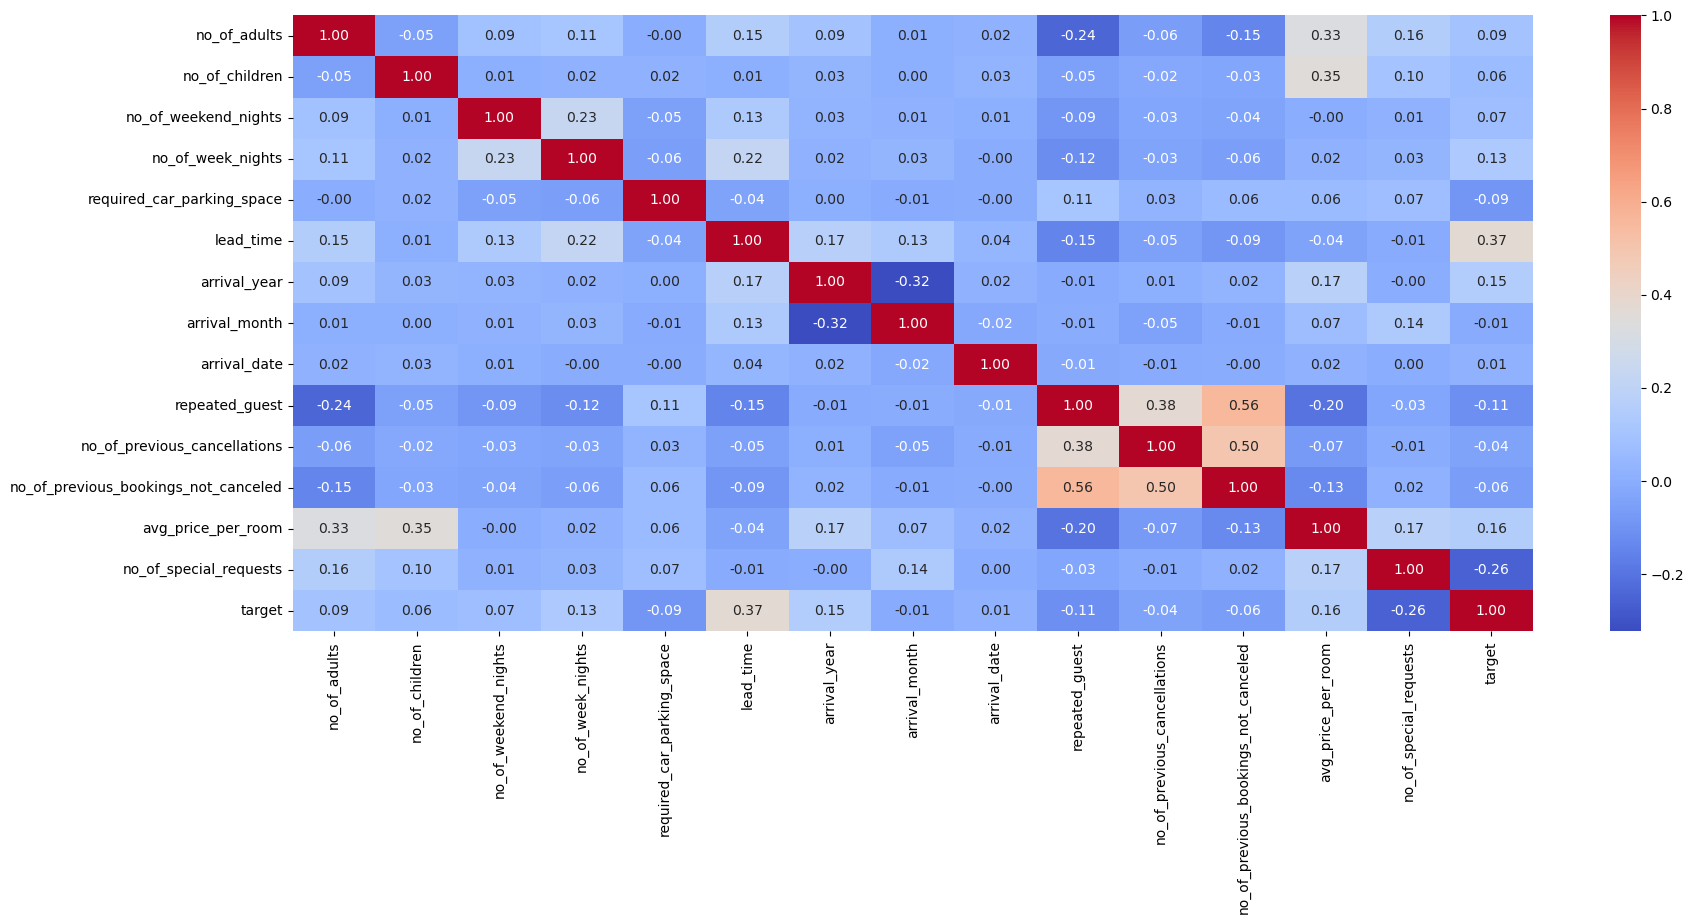

In [2004]:
numerical_cols=df.select_dtypes(include="number")

numerical_cols["target"] = target_encoded_temp

corr_matrix = numerical_cols.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# irrelevant columns

no_of_previous_cancelation && arrival_date && arrival_month && no_of_children



# Check Correct Data Types

In [2005]:
def Correct_Data_Types(data):
    
    """
    This function identifies columns that should be categorical with less unique values.
    """
    num_cols = data.select_dtypes(include="number")
    result = []  

    for col in num_cols.columns:

        unique_ratio = (data[col].nunique() / len(data)) * 100
        
        if unique_ratio <= 10:
            
            result.append({
                'Column': col,
                'Current Data Type': str(data[col].dtype),
                'Suggested Data Type': "category"
            })
        
    return pd.DataFrame(result)

In [2006]:
Correct_Data_Types(df)

,Column,Current Data Type,Suggested Data Type
0,no_of_adults,int64,category
1,no_of_children,int64,category
2,no_of_weekend_nights,int64,category
3,no_of_week_nights,int64,category
4,required_car_parking_space,int64,category
5,lead_time,int64,category
6,arrival_year,int64,category
7,arrival_month,int64,category
8,arrival_date,int64,category
9,repeated_guest,int64,category


In [2007]:
percent=df[df["lead_time"]>270]["lead_time"].count()/len(df)*100
display(f"Percent of nunique in lead_time = {percent:.2f}% ")

'Percent of nunique in lead_time = 1.50% '

# Convert Wrong Data Types

In [2008]:
converted_features = [
    "no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "required_car_parking_space",
    "arrival_year", "arrival_month", "arrival_date", "repeated_guest","lead_time" ,"no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled", "no_of_special_requests"
]

In [2009]:
def convert_data(data,converted_columns,NewDataType):
    """
    This function converts columns data types to another dtype.
    """
    for col in converted_columns:

        data[col] = data[col].astype(NewDataType)

In [2010]:
convert_data(df,converted_features,"category")

In [2011]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,no_of_adults,category,"[2, 1, 3, 0, 4]",5,0,0.0,0
1,no_of_children,category,"[0, 1, 2, 3, 9, 10]",6,0,0.0,0
2,no_of_weekend_nights,category,"[0, 1, 2, 3, 4, 5, 6, 7]",8,0,0.0,0
3,no_of_week_nights,category,"[2, 1, 3, 4, 0, 5, 6, 7, 8, 10]",18,0,0.0,0
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0,0.0,0
5,required_car_parking_space,category,"[0, 1]",2,0,0.0,0
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",7,0,0.0,0
7,lead_time,category,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 12]",352,0,0.0,0
8,arrival_year,category,"[2018, 2017]",2,0,0.0,0
9,arrival_month,category,"[10, 8, 9, 12, 7, 11, 4, 3, 6, 5]",12,0,0.0,0


# visualizing Categorical columns

In [2012]:
def plot_features(data,flag):
    """
    This Function to plot all features\n
    if flag=1 then plot categorical features\n
    if flag=2 then plot numerical features with skeweness\n
    """
    #for categorical features
    if flag ==1:
        cat_cols=data.select_dtypes(include=["category","object"]).columns
        plt.figure(figsize=(15,16))
        total_cols=3
        total_rows=math.ceil(len(cat_cols)/total_cols)
        idx=1

        for col in cat_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.countplot(x=col,data=data,palette="rocket")

            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()

    # Plot numerical features
    elif flag==2:
        num_cols=data.select_dtypes(include=["number"]).columns
        total_cols=3
        total_rows=math.ceil(len(num_cols)/total_cols)
        plt.figure(figsize=(20,4*total_rows))

        idx=1

        for col in num_cols:
            plt.subplot(total_rows,total_cols,idx)
            n,bins,_=plt.hist(df[col],bins=20,edgecolor='black')
            plt.title(f"{col} distribution and skewness= {data[col].skew()}")
            idx+=1
            plt.xticks(bins)
        plt.tight_layout()
        plt.show()

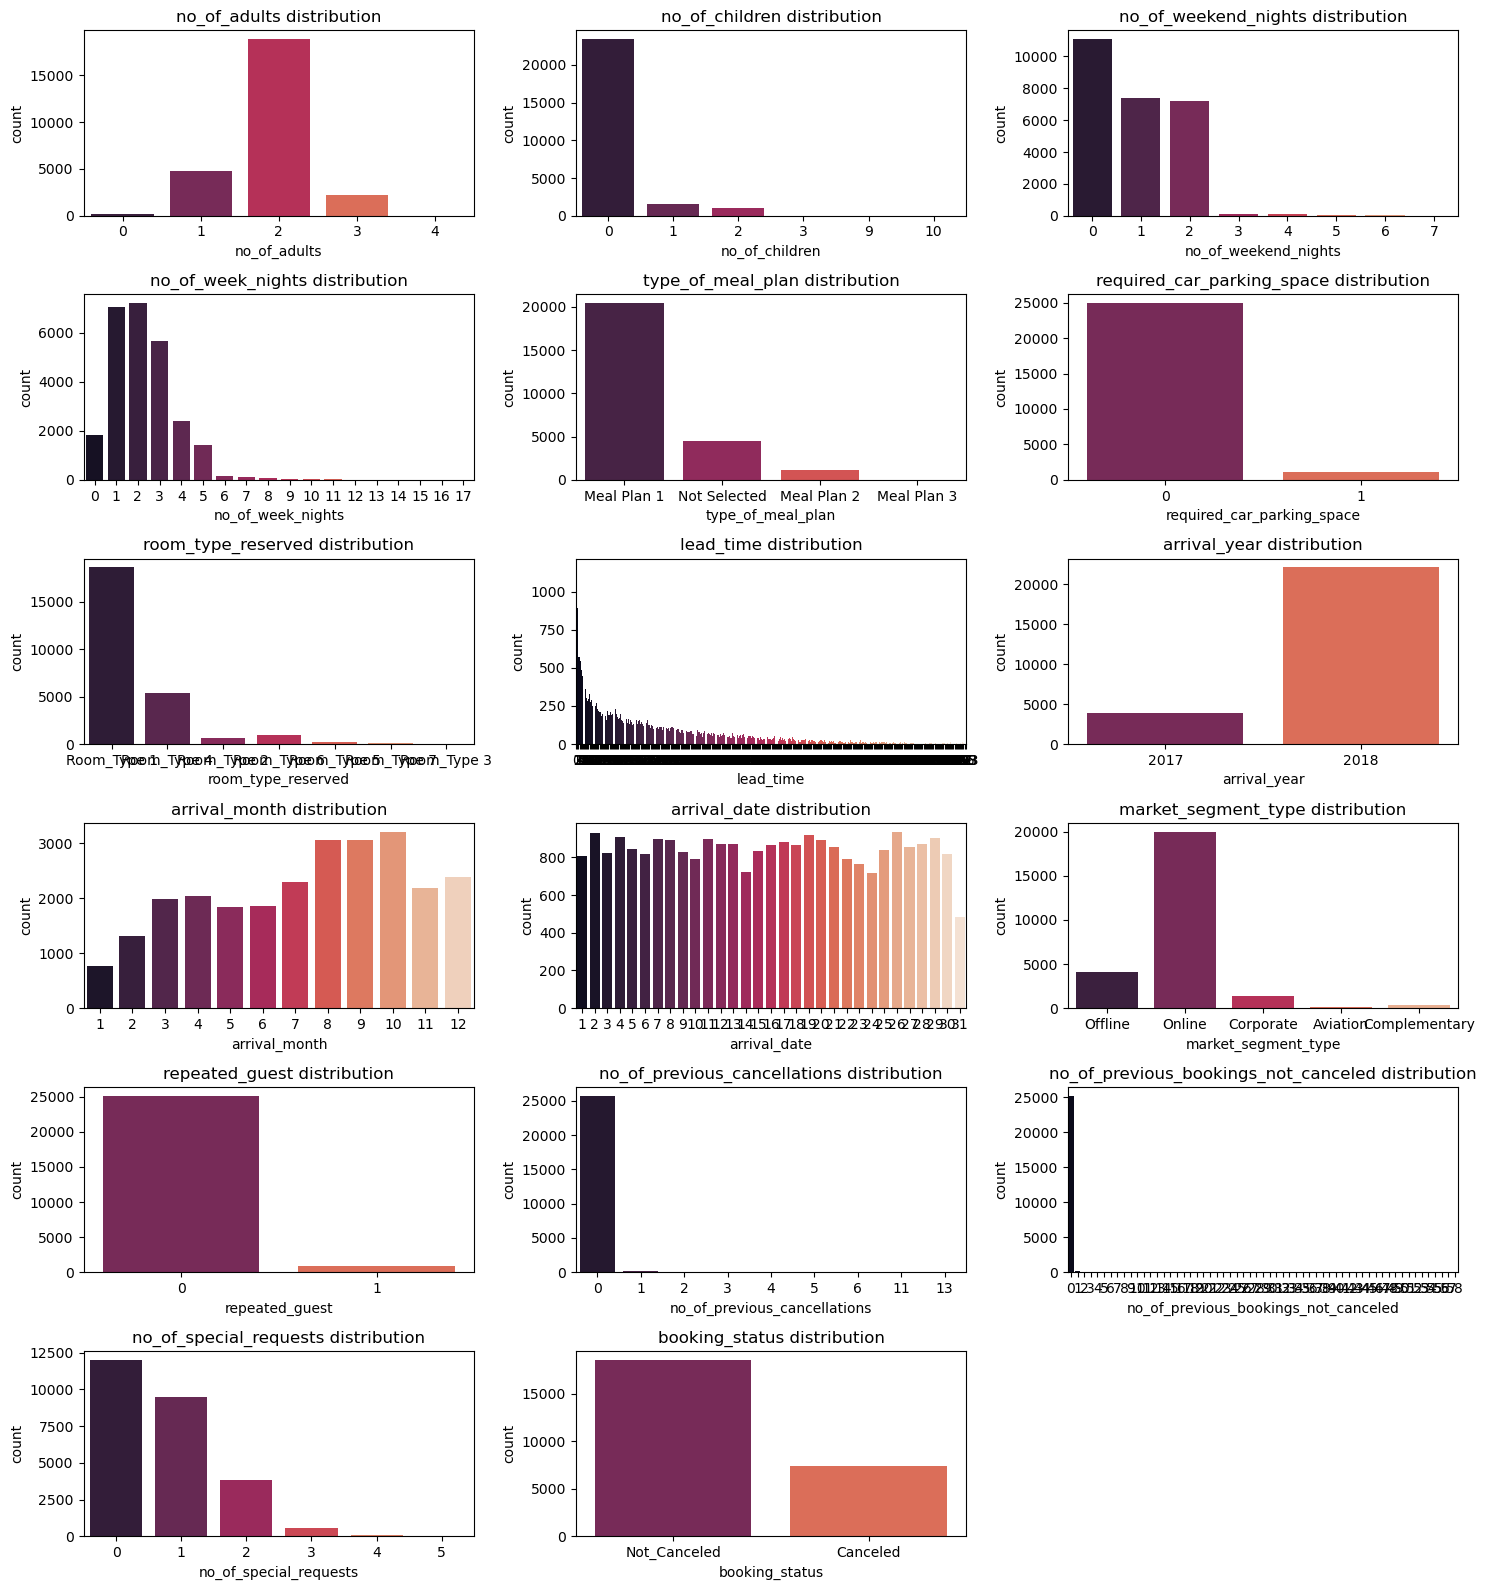

In [2013]:
plot_features(df,1)

# some knowledge from previous figure

1-most of adults is between (1,2,3)

2-most of people dont have children

3-people in the weekend dont stay more then 3 nights 

and in week they stay between (1,2,3,4,5) weeks 

4- high percent of people dont request parking space

5- most of data collected when people visit the hotel in 2018

6-most of people choose meal paln 1

7-most of visitors choose room type 1

8- about 50% of requests online

9- most of guests are new (first time to request)

10- about 99% of people previous requests not canceled
maybe because they are new visitors 

11-and most of people request and arrive in the same day

# visualizing Categorical columns with target column

In [2014]:
def plot_features_with_target(data,target,flag):
    """
    This function plots features with Target Column.\n
    If flag=1 then plot categorical features with Target Column\n
    if flag=2 then plot numerical features with Target Column\n
    """
    # for categorical features
    if flag==1:
        cat_cols=data.select_dtypes(include=["category","object"]).columns
        plt.figure(figsize=(16,16))
        total_cols=3
        total_rows=math.ceil(len(cat_cols)/total_cols)
        idx=1

        for col in cat_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.countplot(x=col,data=data,palette="rocket",hue=target)
            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()

    # for numerical features
    elif flag==2:
        num_cols=data.select_dtypes(include=["number"]).columns
        total_cols=3
        total_rows=math.ceil(len(num_cols)/total_cols)
        plt.figure(figsize=(20,5*total_rows))
        idx=1

        for col in num_cols:
            plt.subplot(total_rows,total_cols,idx)
            sns.barplot(y = data[col], x = data[target], palette = "rocket")
            plt.title(f"{col} distribution")
            idx+=1
        plt.tight_layout()
        plt.show()


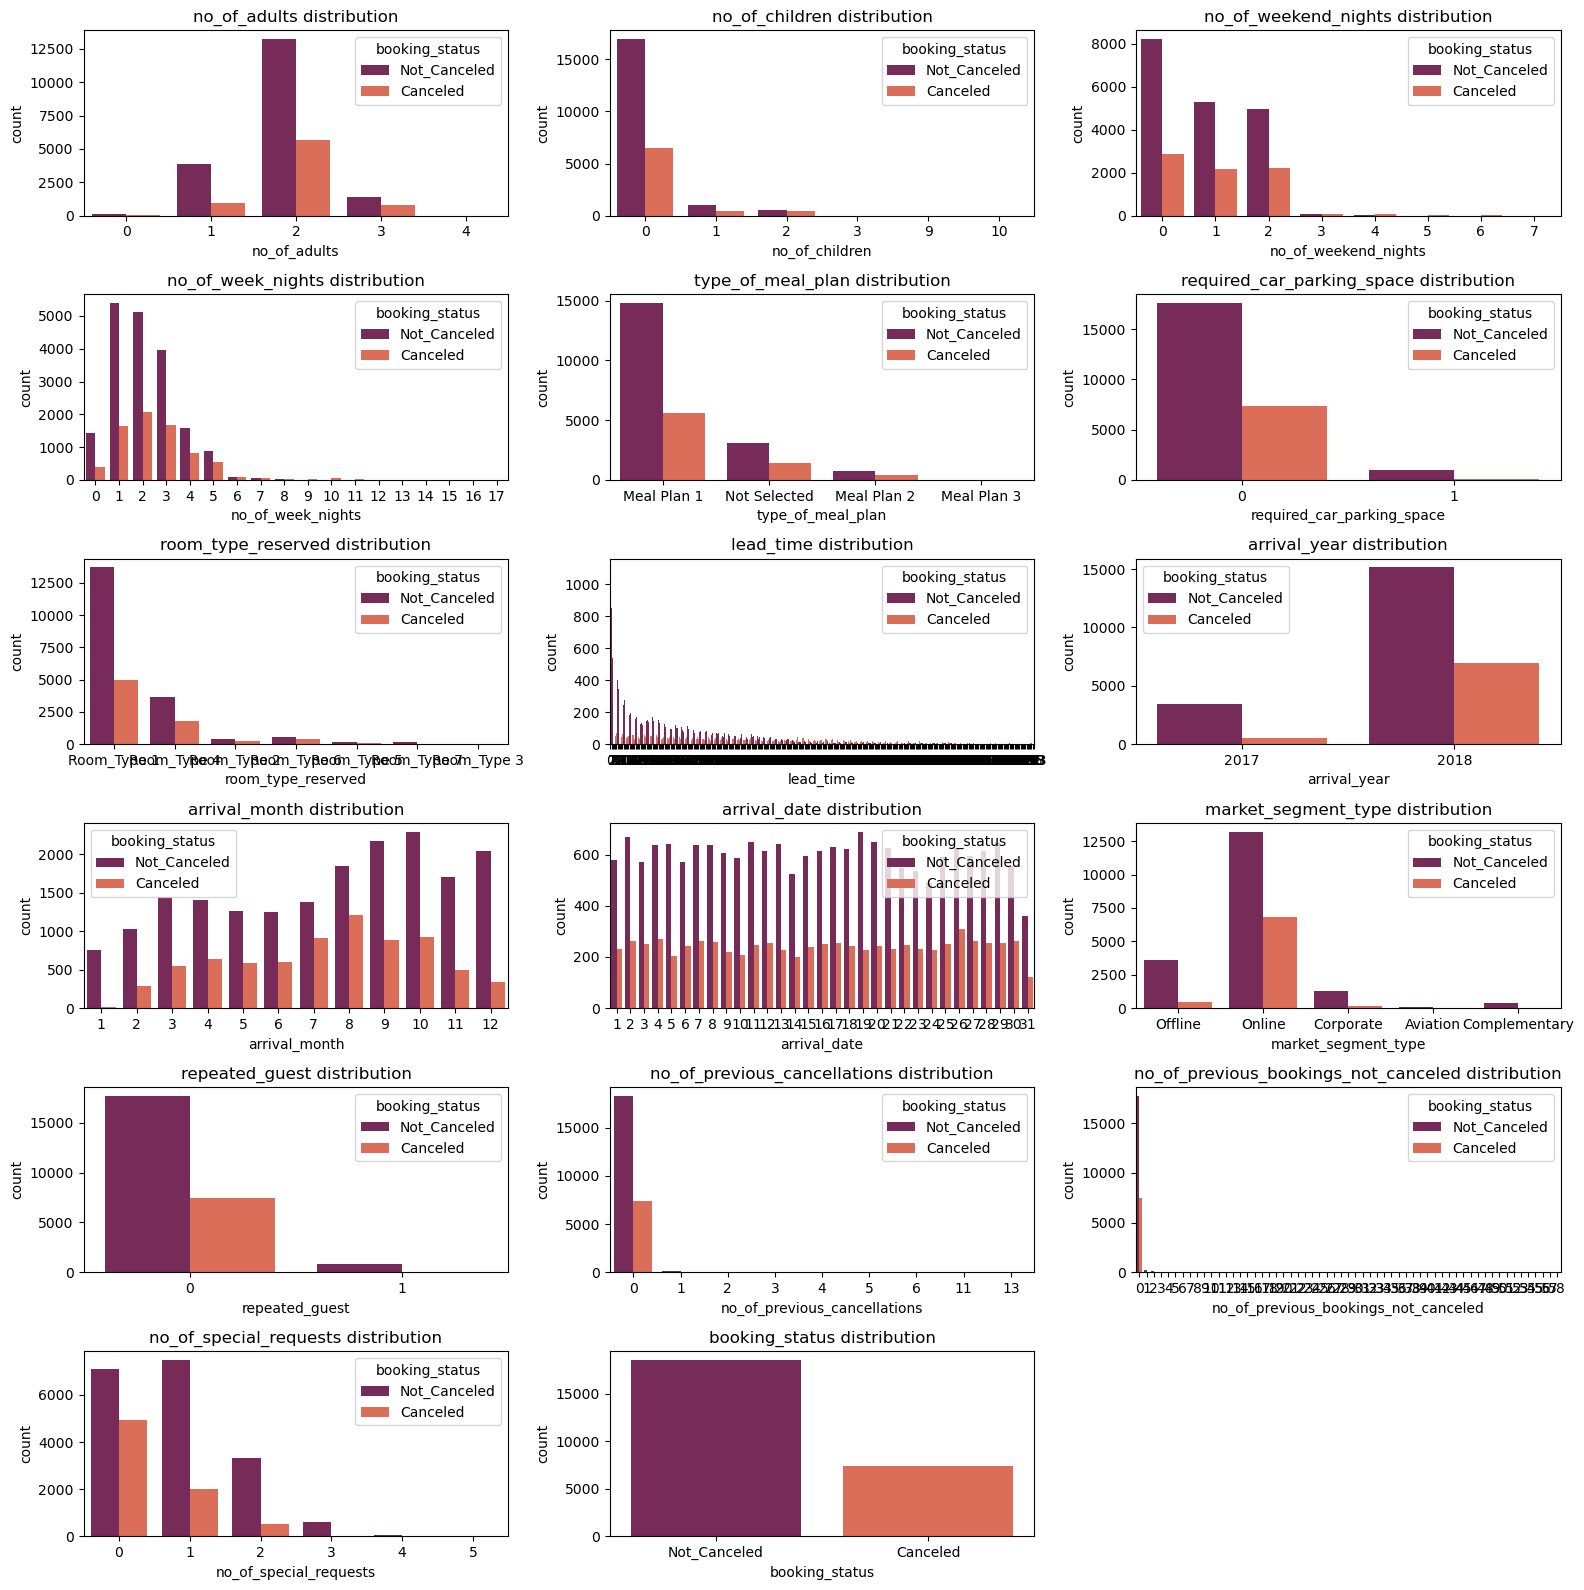

In [2015]:
plot_features_with_target(df, "booking_status", 1)

# visualize numerical features 

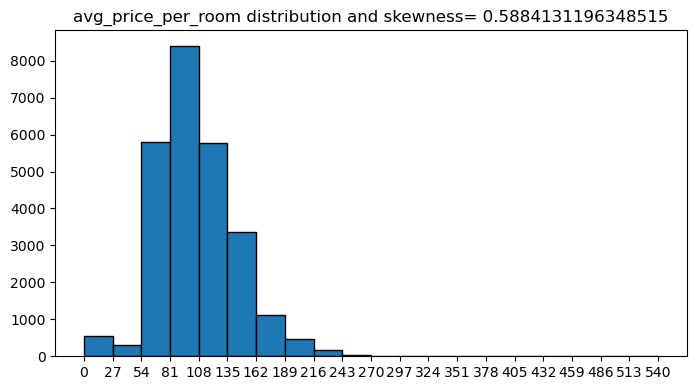

In [2016]:
plot_features(df,2)

most taken rooms range of salaries are 54 -> 135

# visualize numerical features with target

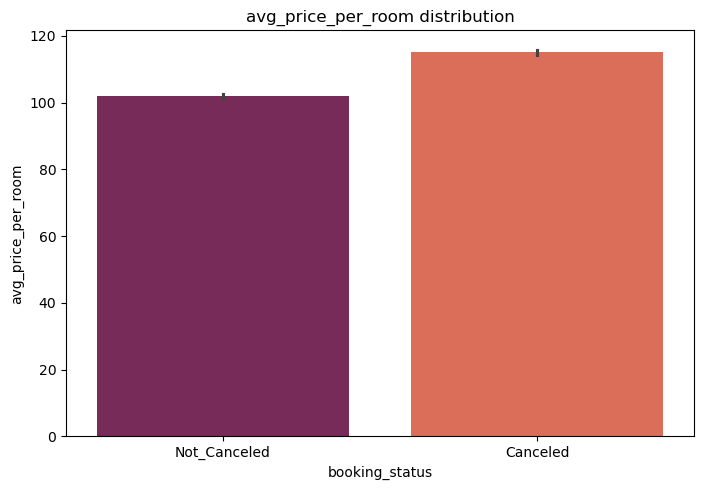

In [2017]:
plot_features_with_target(df,"booking_status",2)

We can see that when a person pays a lot for a room, there is a high probability of them canceling the booking.

# Handle Numerical outliers

In [2018]:
cnt=df[df["avg_price_per_room"]>200]["avg_price_per_room"].count()
percent=df[df["avg_price_per_room"]>200]["avg_price_per_room"].count()/len(df)*100

display(f"Num of Outliers= {cnt}")
display(f"Percentage of Outliers= {percent:.2f}%")

'Num of Outliers= 461'

'Percentage of Outliers= 1.77%'

In [2019]:
def visualize_outliers(data,whisk=1.5):
    """
    This function visualizes numerical features by box plot.
    """
    num_cols = data.select_dtypes(include="number").columns
   
    for col in num_cols:
        sns.boxplot(x=data[col],whis=whisk)
        plt.title(f"{col} distribution")
        plt.show()

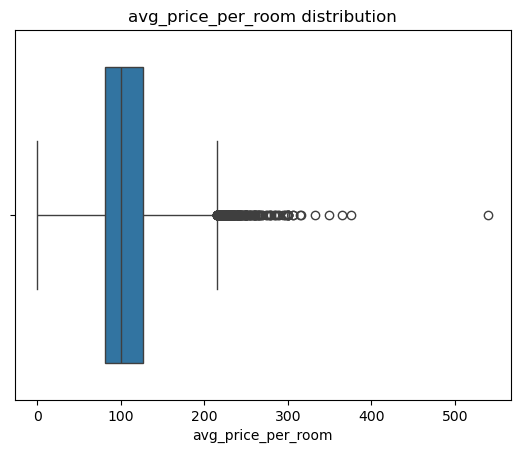

In [2020]:
visualize_outliers(df,whisk=1.9)

In [2021]:
def handle_outliers(data,num_col,whisker=1.5):
    """
    This function handles outliers.
    """
   
    Q1=data[num_col].quantile(0.25)
    Q3=data[num_col].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-(whisker*IQR)
    upper_bound=Q3+(whisker*IQR)

    data[num_col]=np.where(data[num_col]<lower_bound,lower_bound,data[num_col])
    data[num_col]=np.where(data[num_col]>upper_bound,upper_bound,data[num_col])

In [2022]:
handle_outliers(df,"avg_price_per_room",1.9)

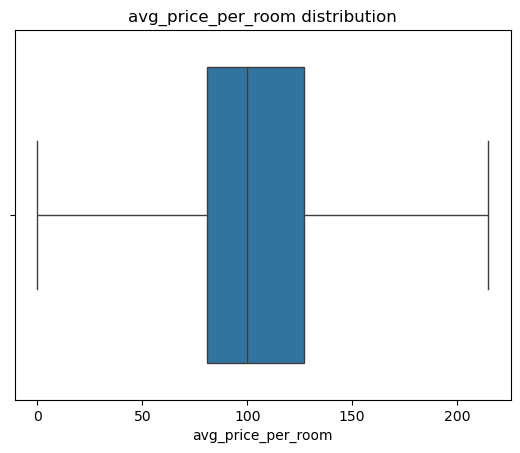

In [2023]:
visualize_outliers(df,whisk=1.9)

# Handling Categorical Outliers

In [2024]:
lead_temp=df["lead_time"].astype("int")

cnt=lead_temp[lead_temp>270].count()
percent=lead_temp[lead_temp>270].count()/len(df)*100

display(f"Num of Outliers= {cnt}")
display(f"Percentage of Outliers= {percent:.2f}%")

'Num of Outliers= 391'

'Percentage of Outliers= 1.50%'

In [2025]:
mode_value = df["lead_time"].mode()[0]

df["lead_time"] = np.where(lead_temp > 270, mode_value, df["lead_time"])

In [2026]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,no_of_adults,category,"[2, 1, 3, 0, 4]",5,0,0.0,8
1,no_of_children,category,"[0, 1, 2, 3, 9, 10]",6,0,0.0,8
2,no_of_weekend_nights,category,"[0, 1, 2, 3, 4, 5, 6, 7]",8,0,0.0,8
3,no_of_week_nights,category,"[2, 1, 3, 4, 0, 5, 6, 7, 8, 10]",18,0,0.0,8
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0,0.0,8
5,required_car_parking_space,category,"[0, 1]",2,0,0.0,8
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",7,0,0.0,8
7,lead_time,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 12]",271,0,0.0,8
8,arrival_year,category,"[2018, 2017]",2,0,0.0,8
9,arrival_month,category,"[10, 8, 9, 12, 7, 11, 4, 3, 6, 5]",12,0,0.0,8


In [2027]:
df.drop_duplicates(inplace=True)

# Feature Extraction

1- season from (arrival_month)-> summer , winter , spring , fall

In [2028]:
def get_season(month):
    if month in [12, 1, 2]:  
        return 'Winter'
    elif month in [3, 4, 5]: 
        return 'Spring'
    elif month in [6, 7, 8]:  
        return 'Summer'
    else:
        return 'Fall'

In [2029]:
df['season'] = df['arrival_month'].apply(get_season)

2- total nights from (weekend nights , week nights ) 

as weekend represent Number of weekend nights (Saturday or Sunday) 

and week nights represent Number of week nights (Monday to Friday)

total nights = weekend nights + week nights

In [2030]:
df['total_nights'] = df['no_of_weekend_nights'].astype(int) + df['no_of_week_nights'].astype(int)

In [2031]:
df["total_nights"]= df['total_nights'].astype("category")

In [2032]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,no_of_adults,category,"[2, 1, 3, 0, 4]",5,0,0.0,0
1,no_of_children,category,"[0, 1, 2, 3, 9, 10]",6,0,0.0,0
2,no_of_weekend_nights,category,"[0, 1, 2, 3, 4, 5, 6, 7]",8,0,0.0,0
3,no_of_week_nights,category,"[2, 1, 3, 4, 0, 5, 6, 7, 8, 10]",18,0,0.0,0
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0,0.0,0
5,required_car_parking_space,category,"[0, 1]",2,0,0.0,0
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",7,0,0.0,0
7,lead_time,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 12]",271,0,0.0,0
8,arrival_year,category,"[2018, 2017]",2,0,0.0,0
9,arrival_month,category,"[10, 8, 9, 12, 7, 11, 4, 3, 6, 5]",12,0,0.0,0


# Dropping irrelevant columns

In [2033]:
li=["no_of_previous_cancellations","arrival_date","arrival_month","no_of_children"]

df.drop(li,axis=1,inplace=True)

# Split The data 

In [2034]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Encoding

In [2035]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status', 'season'],
      dtype='object')

In [2036]:
for col in categorical_columns:
    print(df[col].nunique())
    print(df[col].unique())
    print("#"*100)

4
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
####################################################################################################
7
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
####################################################################################################
5
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
####################################################################################################
2
['Not_Canceled' 'Canceled']
####################################################################################################
4
['Fall' 'Winter' 'Spring' 'Summer']
####################################################################################################


In [2037]:
mean_price_per_room_type = df.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values()
mean_price_per_room_type

room_type_reserved
Room_Type 3     85.958333
Room_Type 2     87.675843
Room_Type 1     95.861844
Room_Type 5    121.508470
Room_Type 4    125.875695
Room_Type 7    143.706186
Room_Type 6    178.336700
Name: avg_price_per_room, dtype: float64

# so encoding the Room column will be nominal

In [2038]:
encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])

In [2039]:
x_train = train_data.drop(columns=["booking_status"])
y_train = train_data["booking_status"]

x_test = test_data.drop(columns=["booking_status"])
y_test = test_data["booking_status"]


# Scaling

In [2040]:
scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Balancing Data 

In [2041]:
# smote = SMOTE(random_state=42)

# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Model Training

In [2044]:
def models(x_train, y_train,x_test,y_test):
    
    returnedDataFrame={}
    # descision tree gini
    # best with max_depth 11 and default min_sample_split

    Gini_dict={}

    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=11)
    clf_gini.fit(x_train, y_train)

    y_pred = clf_gini.predict(x_test)

    test_accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)


    y_pred_train=clf_gini.predict(x_train)

    train_accuracy=accuracy_score(y_train,y_pred_train)

    Gini_dict.update({"test_accuracy":test_accuracy,"train_accuracy":train_accuracy,
                      "f1_score":f1,"recall":recall,"precision":precision})
    
    returnedDataFrame.update({"DT_gini":Gini_dict})

##########################################################################################
##########################################################################################

    # descision tree entropy
    # best with and max_depth 11 and default min_sample_split

    entropy_dict={}

    clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth = 11)
    clf_entropy.fit(x_train, y_train)

    y_pred = clf_entropy.predict(x_test)

    test_accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)


    y_pred_train=clf_entropy.predict(x_train)

    train_accuracy=accuracy_score(y_train,y_pred_train)

    entropy_dict.update({"test_accuracy":test_accuracy,"train_accuracy":train_accuracy,
                          "f1_score":f1,"recall":recall,"precision":precision})
    
    returnedDataFrame.update({"DT_entropy":entropy_dict})

##################################################################################################
##################################################################################################
    
    # logistic regression
    logistic_dict={}

    clf_lr = LogisticRegression(random_state=42)
    clf_lr.fit(x_train, y_train)

    y_pred = clf_lr.predict(x_test)

    test_accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)


    y_pred_train=clf_lr.predict(x_train)

    train_accuracy=accuracy_score(y_train,y_pred_train)


    logistic_dict.update({"test_accuracy":test_accuracy,"train_accuracy":train_accuracy,
                          "f1_score":f1,"recall":recall,"precision":precision})
    
    returnedDataFrame.update({"Logistic_Reg":logistic_dict})

########################################################################################################
########################################################################################################

    # Random Forest

    RandomForest_dict={}
    clf_rf = RandomForestClassifier(random_state=42,max_depth=15,n_estimators=100,max_leaf_nodes=760)
    clf_rf.fit(x_train, y_train)

    y_pred = clf_rf.predict(x_test)


    test_accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)


    y_pred_train=clf_rf.predict(x_train)
    train_accuracy=accuracy_score(y_train,y_pred_train)

    RandomForest_dict.update({"test_accuracy":test_accuracy,"train_accuracy":train_accuracy,
                          "f1_score":f1,"recall":recall,"precision":precision})
    
    returnedDataFrame.update({"Random_Forest":RandomForest_dict})

    return pd.DataFrame(returnedDataFrame)

In [2046]:
model=models(x_train,y_train,x_test,y_test)
model

,DT_gini,DT_entropy,Logistic_Reg,Random_Forest
test_accuracy,0.841123,0.841316,0.802462,0.849202
train_accuracy,0.873275,0.869908,0.805127,0.885250
f1_score,0.890422,0.890945,0.868114,0.897917
recall,0.909732,0.913527,0.916237,0.934671
precision,0.871915,0.869453,0.824793,0.863944


# Highest Model is Random Forest